In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
DATA_DIR = "../input/tabular-playground-series-sep-2022/"
os.listdir(DATA_DIR)

['sample_submission.csv', 'train.csv', 'test.csv']

In [22]:
train_df = pd.read_csv(DATA_DIR+'train.csv', index_col='row_id')
train_df.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [23]:
train_df.shape

(70128, 5)

In [24]:
test_df = pd.read_csv(DATA_DIR+'test.csv')
test_df.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [25]:
train_df['date'] = pd.to_datetime(train_df['date'])


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      70128 non-null  datetime64[ns]
 1   country   70128 non-null  object        
 2   store     70128 non-null  object        
 3   product   70128 non-null  object        
 4   num_sold  70128 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.2+ MB


In [27]:
train_df.isnull().sum().sort_values(ascending=False)

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [29]:
print(train_df['product'].nunique())
print(train_df['country'].nunique())

4
6


In [53]:
country_wise_sale = train_df.groupby(['date','country'], as_index=False)['num_sold'].sum()
country_wise_sale

,date,country,num_sold
0,2017-01-01,Belgium,3320
1,2017-01-01,France,2939
2,2017-01-01,Germany,3437
3,2017-01-01,Italy,2431
4,2017-01-01,Poland,1074
...,...,...,...
8761,2020-12-31,France,2718
8762,2020-12-31,Germany,2943
8763,2020-12-31,Italy,3032
8764,2020-12-31,Poland,2942


<AxesSubplot:xlabel='date', ylabel='num_sold'>

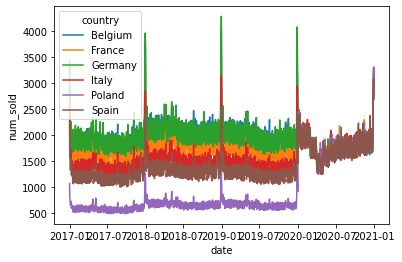

In [61]:
sns.lineplot(data = country_wise_sale, x='date', y='num_sold', hue='country')